In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import ast
import math

In [2]:
test_full_data = pd.read_csv("./ukiyo-e_artworks_labels.csv")
test_full_data['LABELS'] = test_full_data['LABELS'].apply(lambda x: ast.literal_eval(x))
print(len(test_full_data))
test_full_data.tail(3)

177985


,Unnamed: 0,Image URL,Artist,Title,Date,Details,Source,Description,Similar Prints,LABELS
177982,177982,https://data.ukiyo-e.org/artelino/scaled/31208...,Kusaka Kenji,Mt.Fuji is seen around Miya,1949.,http://www.artelino.com/archive/archivesearch_...,http://artelino.com/,"""Fuji Miya Fukin"". Mt. Fuji is seen from the a...","['https://ukiyo-e.org/image/artelino/19069g1',...","[see, area, near, see, around]"
177983,177983,https://data.ukiyo-e.org/artelino/scaled/50236...,Kusaka Kenji,Kiyomizu Temple,1948..,http://www.artelino.com/archive/archivesearch_...,http://artelino.com/,The performance platform of Kiyomizu temple in...,['https://ukiyo-e.org/image/jaodb/Kawai_Kenji-...,"[performance, platform, temple, autumn, temple]"
177984,177984,https://data.ukiyo-e.org/artelino/scaled/15906...,Kusaka Kenji,Ski Slope in Akino,Ca. 1950s.,http://www.artelino.com/archive/archivesearch_...,http://artelino.com/,Ski Slope in Akino.,['https://ukiyo-e.org/image/jaodb/Kawai_Kenji-...,"[ski, slope, ski, slope]"


In [3]:
keywords = ['Emperor', 'Shogun', 'Minister', 'Vote', 'Constitution',
              'Courtroom', 'Contract', 'Patent', 'Judge', 'Lawyer', 'Police', 'Prison',
              'School', 'Uniform', 'Textbook', 'Scientific instrument',
              'Steamship', 'Telegraph', 'Brick',
              'Factory', 'Steam', 'Worker', 'Railway', 'Train',
              'Soldier', 'Gun', 'Warship',
              'Kimono', 'Suit', 'Gown', 'Glove']

keywords = [x.lower() for x in keywords]

In [4]:
def kw_in_labels(labels):
    res = {k: 0 for k in keywords}
    for l in labels:
        if (l in keywords):
            res[l] = res[l] + 1
    return res

test_full_data['kws2'] = test_full_data['LABELS'].apply(lambda x: kw_in_labels(x))
test_full_data[['LABELS', 'kws2']].head()

full_res = {k: 0 for k in keywords}

# make the huge dictionary
for _, d in test_full_data.iterrows():
    dico = d.kws2
    for k in keywords:
        full_res[k] = full_res[k] + dico[k]

print(full_res)

{'emperor': 699, 'shogun': 335, 'minister': 65, 'vote': 0, 'constitution': 31, 'courtroom': 0, 'contract': 17, 'patent': 120, 'judge': 47, 'lawyer': 0, 'police': 40, 'prison': 9, 'school': 282, 'uniform': 33, 'textbook': 4, 'scientific instrument': 0, 'steamship': 16, 'telegraph': 9, 'brick': 24, 'factory': 21, 'steam': 73, 'worker': 102, 'railway': 45, 'train': 85, 'soldier': 213, 'gun': 98, 'warship': 30, 'kimono': 1372, 'suit': 42, 'gown': 28, 'glove': 12}


In [13]:
kws_nonzero = [k for (k, v) in full_res.items() if (v > 0)]
print(kws_nonzero)
print(len(kws_nonzero))

['emperor', 'shogun', 'minister', 'constitution', 'contract', 'patent', 'judge', 'police', 'prison', 'school', 'uniform', 'textbook', 'steamship', 'telegraph', 'brick', 'factory', 'steam', 'worker', 'railway', 'train', 'soldier', 'gun', 'warship', 'kimono', 'suit', 'gown', 'glove']
27


In [10]:
dico_per_image = test_full_data[['kws2']]
type(dico_per_image)
test_full_data[['kws2']].head()

,kws2
0,"{'emperor': 0, 'shogun': 0, 'minister': 0, 'vo..."
1,"{'emperor': 0, 'shogun': 0, 'minister': 0, 'vo..."
2,"{'emperor': 0, 'shogun': 0, 'minister': 0, 'vo..."
3,"{'emperor': 0, 'shogun': 0, 'minister': 0, 'vo..."
4,"{'emperor': 0, 'shogun': 0, 'minister': 0, 'vo..."


In [11]:
word_matrix = pd.DataFrame(index=np.arange(len(dico_per_image)), columns=full_res.keys())

for i, d in dico_per_image.iterrows():
    dico = d['kws2']
    for k in dico.keys():
        word_matrix[k].loc[i] = dico[k]

After this, two things to do:

- Calculate similarity (find package, and get similarity from the word_matrix I'm creating)
- Merge the full_test_data with the time dataframe, and for each keyword in the kws, create a graph showing time evolution of the word's appearance.

In [13]:
print(word_matrix)
word_matrix.to_csv('./keyword_matrix.csv')

       emperor shogun minister vote constitution courtroom contract patent  \
0            0      0        0    0            0         0        0      0   
1            0      0        0    0            0         0        0      0   
2            0      0        0    0            0         0        0      0   
3            0      0        0    0            0         0        0      0   
4            0      0        0    0            0         0        0      0   
...        ...    ...      ...  ...          ...       ...      ...    ...   
177980       0      0        0    0            0         0        0      0   
177981       0      0        0    0            0         0        0      0   
177982       0      0        0    0            0         0        0      0   
177983       0      0        0    0            0         0        0      0   
177984       0      0        0    0            0         0        0      0   

       judge lawyer  ... worker railway train soldier gun warsh

In [5]:
kws = pd.read_csv('./keyword_matrix.csv').rename(columns={'Unnamed: 0': 'index'})
kws.tail(3)

,index,emperor,shogun,minister,vote,constitution,courtroom,contract,patent,judge,...,worker,railway,train,soldier,gun,warship,kimono,suit,gown,glove
177982,177982,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177983,177983,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177984,177984,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dates = test_full_data[['Title', 'Date', 'Image URL']].reset_index()
dates.head()

,index,Title,Date,Image URL
0,0,NaN,1711,https://data.ukiyo-e.org/bm/scaled/AN00418884_...
1,1,Actor Sanogawa Ichimatsu as a Falconer,1740,https://data.ukiyo-e.org/mfa/scaled/sc220382.jpg
2,2,Courtesan likened to the Chinese sage Zhang Gu...,"[1715, printed later]",https://data.ukiyo-e.org/loc/scaled/02127v.jpg
3,3,NaN,1686-1764 (artist),https://data.ukiyo-e.org/bm/scaled/AN00420719_...
4,4,"Tsuri ---Ki no sendaku, from an untitled serie...","Japanese, Edo period",https://data.ukiyo-e.org/mfa/scaled/sc200151.jpg


In [7]:
kws_times = dates.merge(kws, on='index')
print(len(kws_times))
kws_times.head(1)

177985


,index,Title,Date,Image URL,emperor,shogun,minister,vote,constitution,courtroom,...,worker,railway,train,soldier,gun,warship,kimono,suit,gown,glove
0,0,NaN,1711,https://data.ukiyo-e.org/bm/scaled/AN00418884_...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dtime = pd.read_csv('./data_time.csv')[['Title', 'Date', 'Year', 'Period', 'Image URL']]
dtime.head()
kws_times2 = dtime.merge(kws_times, on=['Title', 'Date', 'Image URL']).drop('index', axis=1)
print(len(dtime))
print(len(kws_times2))
kws_times2.head(1)

82648
93852


,Title,Date,Year,Period,Image URL,emperor,shogun,minister,vote,constitution,...,worker,railway,train,soldier,gun,warship,kimono,suit,gown,glove
0,NaN,1711,1711,Edo (pre-opening),https://data.ukiyo-e.org/bm/scaled/AN00418884_...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2.,  1.,  1.,  1.,  0.,  1.,  3., 11.,  2.,
         0.,  2.,  8.,  9.,  0.,  0.]),
 array([1600., 1610., 1620., 1630., 1640., 1650., 1660., 1670., 1680.,
        1690., 1700., 1710., 1720., 1730., 1740., 1750., 1760., 1770.,
        1780., 1790., 1800., 1810., 1820., 1830., 1840., 1850., 1860.,
        1870., 1880., 1890., 1900., 1910., 1920.]),
 <BarContainer object of 32 artists>)

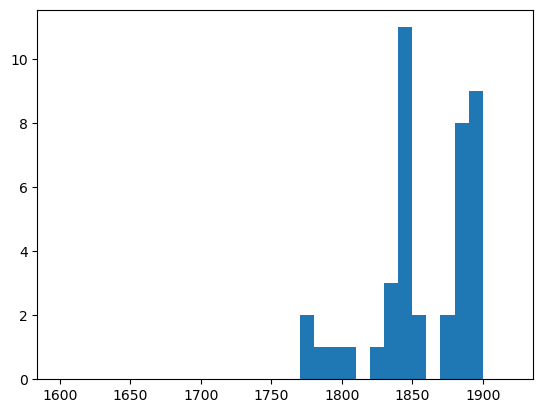

In [11]:
# get the yearly evolution test
k_test = 'minister'
df = kws_times2[['Year', k_test]]
df = df[df[k_test]>0]
plt.hist(df.Year, range=[1600, 1920], bins=32)

Text(0, 0.4, 'Number of prints')

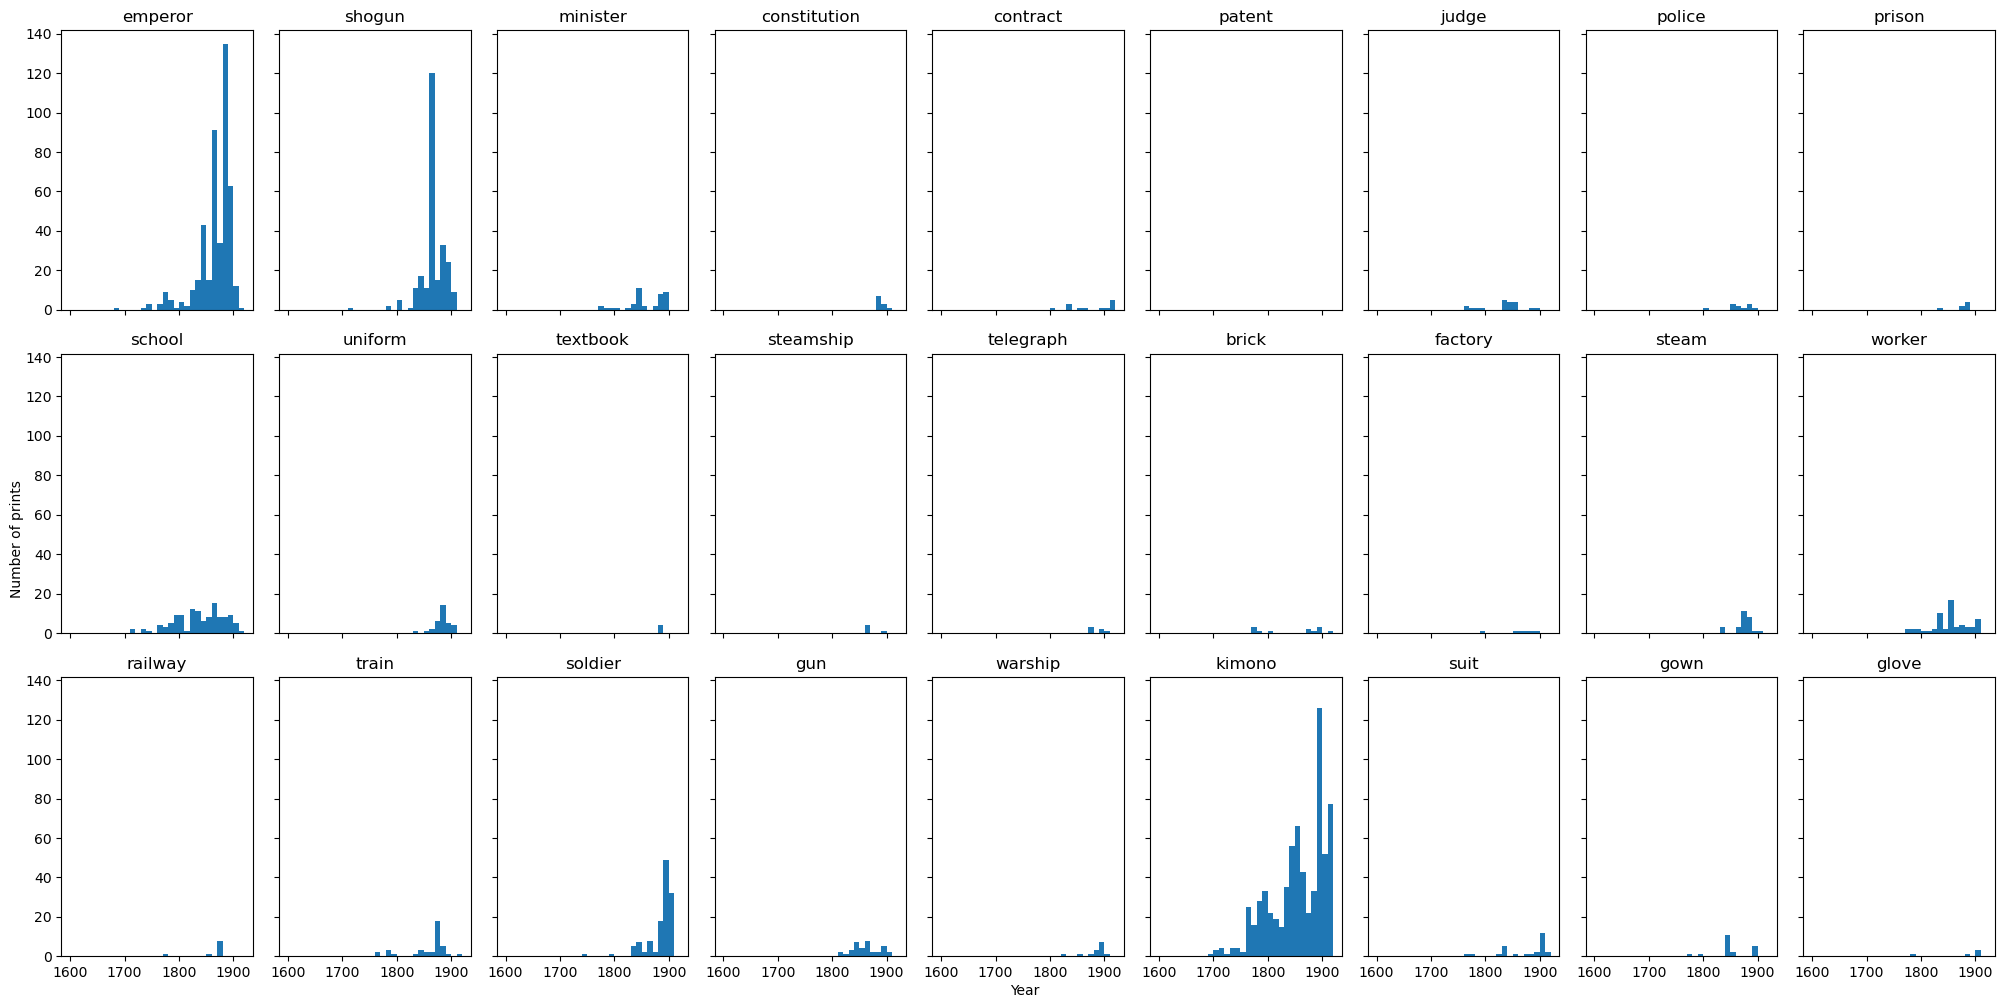

In [16]:
# making the graphs

fig, ax = plt.subplots(3,9,figsize= (20,10), sharey = True, sharex = True)

for i in range(len(kws_nonzero)):
    sbplt = ax[math.floor(i/9), i%9]
    k_test = kws_nonzero[i]
    df = kws_times2[['Year', k_test]]
    df = df[df[k_test]>0]
    sbplt.hist(df.Year, range=[1600, 1920], bins=32)
    sbplt.set_title(k_test)
    
fig.tight_layout()

fig.text(0.5,0, "Year")
fig.text(0,0.4, "Number of prints", rotation = 90)